# 노영훈
## 2021년 4월 29일

## 데이터 전처리
- 데이터 가공, 데이터 클렌징, 데이터 핸들링 등으로도 불림
- 전처리에 포함되는 과정
- 데이터 변수별로 값에 이상이 없는지 확인
- 결측치 처리
- 이상치 처리
- 변수 정규화
- 파생 변수 생성
- 데이터 전처리에는 분석하려는 데이터에 대한 이해가 선행되어야함 => 데이터 분석 기준을 정하기가 수월
- 데이터 도메인에 대한 지식 필요

In [22]:
import pandas as pd

In [23]:
kto_201901= pd.read_excel('w09_/up_files/kto_201901.xlsx',
              header=1,
              usecols='A:G',
              skipfooter=4)

In [24]:
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [25]:
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


## 데이터 탐색
- 정수형 변수 특징 살펴보기
- kto_201901.describe()
- 평균적으로 가장 많은 외국인의 입국은 관광의 목적으로 온 경우 확인
- 다음으로 기타, 유학/연수, 상용, 공용 순을 확인
- 관광, 상용, 유학/연수, 공용의 최솟값이 0인 것을 확인

In [26]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [27]:
condition = (kto_201901['관광'] == 0) \
                | (kto_201901['상용'] == 0) \
                | (kto_201901['공용'] == 0) \
                | (kto_201901['유학/연수'] == 0) 
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


## 데이터프레임에 기준년월 추가
- 2010년 1월부터 2020년 5월 까지의 데이터를 활용할 예정이기 때문에 각 데이터마다 기준년월 정보 필요
- kto_201901['기준년월'] = '2019-01'
- kto_201901.head()

In [28]:
kto_201901['기준년월']='2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [29]:
# 국적 데이터만 남기기
# 국적 컬럼에는 지역이랑 혼재 되어있음.
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [30]:
continents_list=['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
condition = (kto_201901.국적.isin(continents_list) == False)

In [31]:
kto_201901.국적.isin(continents_list)

0      True
1     False
2     False
3     False
4     False
      ...  
62    False
63     True
64    False
65     True
66    False
Name: 국적, Length: 67, dtype: bool

In [32]:
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique

<bound method Series.unique of 1           일본
2           대만
3           홍콩
4          마카오
5           태국
6        말레이시아
7          필리핀
8        인도네시아
9         싱가포르
10         미얀마
11         베트남
12          인도
13        스리랑카
14        파키스탄
15       방글라데시
16        캄보디아
17          몽골
18          중국
19          이란
20        이스라엘
21          터키
22      우즈베키스탄
23       카자흐스탄
24         GCC
25      아시아 기타
27          미국
28         캐나다
29         멕시코
30         브라질
31       미주 기타
33          영국
34          독일
35         프랑스
36        네덜란드
37         스웨덴
38         스위스
39        이탈리아
40         덴마크
41        노르웨이
42         벨기에
43       오스트리아
44         스페인
45         그리스
46        포르투갈
47         핀란드
48        아일랜드
49       우크라이나
50         러시아
51       크로아티아
52        루마니아
53        불가리아
54         폴란드
55       구주 기타
57     오스트레일리아
58        뉴질랜드
59      대양주 기타
61    남아프리카공화국
62     아프리카 기타
64        국적미상
66          교포
Name: 국적, dtype: object>

## 인덱스 재설정
- panadas에서 데이터프레임의 인덱스 값은 0 부터 시작
- kto_201901_country는 인덱스가 1부터 시작

In [33]:
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [34]:
# reset_index index값을 0부터 순서대로 초기화
kto_201901_country_newindex = kto_201901_country.reset_index(drop=True)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


## 대륙 컬럼 생성

In [35]:
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 \
+ ['아프리카']*2 + ['기타대륙'] + ['교포']

In [36]:
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


## 국적별 관광객 비율 살펴보기

In [37]:
kto_201901_country_newindex['관광객비율(%)'] = \
round(kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계'] * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


## 관광객 비율 높은/낮은 국가 검색(5개)
- 관광객비율(%) 컬럼으로 내림차순 정렬
- sort_values(by='관광객비율(%)', ascending=False):데이터 정렬함수

In [38]:
#-------------------------------
kto_201901_country_newindex.sort_values(by='관광객비율(%)', ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [39]:
#-------------------------------
kto_201901_country_newindex.sort_values(by='관광객비율(%)', ascending=True).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6


## 대륙별 관광객 비율의 평균 - 피벗 테이블로 확인
- 평균 관광객 비율이 높은 대륙 : 오세아니아
- 반대로 아프리카는 32.7%만 관광 목적으로 방문
- 거리가 가까운 아시아가 아메리카나 유럽보다 낮은 이유

In [40]:
kto_201901_country_newindex.pivot_table(values='관광객비율(%)', index='대륙', aggfunc='mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


## 중국 관광객 비율
- 중국 국적만 필터링

In [41]:
condition = (kto_201901_country_newindex.국적 == '중국')
kto_201901_country_newindex[condition] # 중국인 5명중 4명은 관광객

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


## 기준 년월별로 전체 외국인 관광객 대비 국적별 관광객 비율 확인
- 외국인 관광객의 국적별 비율
- 관광 목적으로 방문하는 전체 외국인들 대비 국적별 관광객 비율
- 2019년 1월 전체 외국인 관광객 숫자 검색

In [42]:
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

884293

In [43]:
# 국적별 관광객비율 = 국적별관광객수/tourist_sum*100
kto_201901_country_newindex['전체비율(%)'] = \
round(kto_201901_country_newindex['관광']/tourist_sum*100)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.0
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,10.0
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,4.0
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.0
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,4.0


## 전체 비율(%) 컬럼 상위 5개국과 비율 검색
- 중국인 관광객이 36.2% : 가장 높은 비율
- 일본, 대만, 미국홍콩 순
- 상위 5개국이 77.3%차지

In [44]:
kto_201901_country_newindex.sort_values('전체비율(%)', \
ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.0
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.0
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,10.0
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,5.0
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,4.0


## 데이터 전처리 과정을 함수로 만들기
- 2019년 1월 데이터에 대한 처리만 진행했지만 125개 파일에 대해 같은 작업 진행 필요 => 2010년 1월 ~2020년 5월 데이터를 하나로 생성
- 작업 단위별로 함수 만든 후 반복문으로 처리

In [45]:
def create_kto_data(yy, mm):
    #1. 불러올 Excel 파일 경로를 지정해주기
    file_path = 'w09_/up_files/kto_{}{}.xlsx'.format(yy, mm)  
    
    # 2. Excel 파일 불러오기 
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')
    
    # 3. "기준년월" 컬럼 추가하기 
    df['기준년월'] = '{}-{}'.format(yy, mm) 
    
    # 4. "국적" 컬럼에서 대륙 제거하고 국가만 남기기 
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']    # 제거할 대륙명 선정하기 
    condition = (df['국적'].isin(ignore_list) == False)    # 대륙 미포함 조건 
    df_country = df[condition].reset_index(drop=True) 
    
    # 5. "대륙" 컬럼 추가하기 
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']    # 대륙 컬럼 생성을 위한 목록 만들어 놓기 
    df_country['대륙'] = continents   
                       
    # 6. 국가별 "관광객비율(%)" 컬럼 추가하기 
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1) 
                       
    # 7. "전체비율(%)" 컬럼 추가하기 
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    # 8. 결과 출력하기 
    return(df_country)

In [46]:
kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


In [47]:
# 반복문을 통해 다수의엑셀 데이터를 불러와서 합치기
for yy in range(2010, 2021): 
    for mm in range(1, 13): 
        yymm = '{}{}'.format(yy, mm)
        print(yymm)

20101
20102
20103
20104
20105
20106
20107
20108
20109
201010
201011
201012
20111
20112
20113
20114
20115
20116
20117
20118
20119
201110
201111
201112
20121
20122
20123
20124
20125
20126
20127
20128
20129
201210
201211
201212
20131
20132
20133
20134
20135
20136
20137
20138
20139
201310
201311
201312
20141
20142
20143
20144
20145
20146
20147
20148
20149
201410
201411
201412
20151
20152
20153
20154
20155
20156
20157
20158
20159
201510
201511
201512
20161
20162
20163
20164
20165
20166
20167
20168
20169
201610
201611
201612
20171
20172
20173
20174
20175
20176
20177
20178
20179
201710
201711
201712
20181
20182
20183
20184
20185
20186
20187
20188
20189
201810
201811
201812
20191
20192
20193
20194
20195
20196
20197
20198
20199
201910
201911
201912
20201
20202
20203
20204
20205
20206
20207
20208
20209
202010
202011
202012


In [48]:
# mm은 "01","02", ...., "12"와 같이 두 자리의 문자로 구성
for yy in range(2010, 2020):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2)
        yymm = '{}{}'.format(yy, mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912


In [49]:
#-------------------------------
# 각 파일을 합해 새 파일 만들기 위한 작업 필요
df = pd.DataFrame()

#-------------------------------
# 엑셀 파일 불러와서 합하기
for yy in range(2010, 2021):
    for mm in range(1, 13):
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        df = df.append(temp, ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'w09_/up_files/kto_202006.xlsx'

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [51]:
df.to_excel('w09_/kto_total.xlsx', index = False)

In [52]:
import matplotlib.pyplot as plt

In [53]:
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')

In [54]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


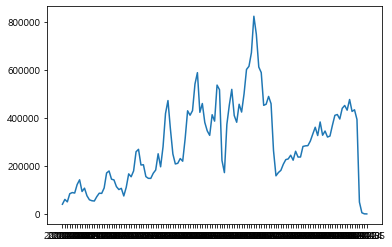

In [55]:
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

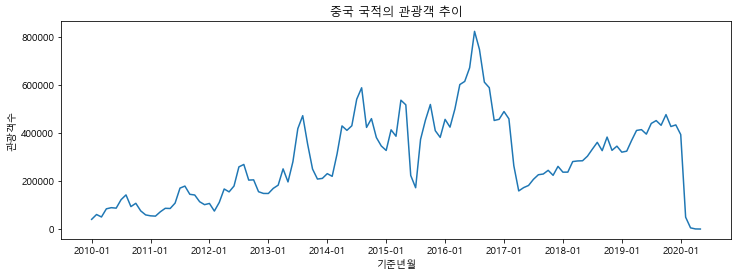

In [60]:
## 그래프 크기 조절 
plt.figure(figsize = (12, 4))

## 그래프 내용 설정 
plt.plot(df_filter['기준년월'], df_filter['관광'])

## 그래프 타이틀, X축, Y축 이름 달기 
#plt.rc('font', family='c:/Windows/Fonts/malgun.ttf')
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
## x 축 눈금 값 설정 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

## 그래프 표현하기 
plt.show()


In [61]:
#-------------------------------
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

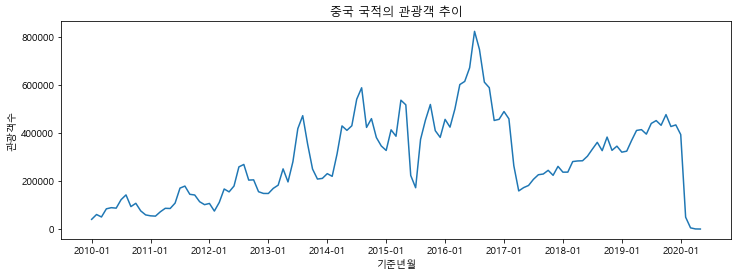

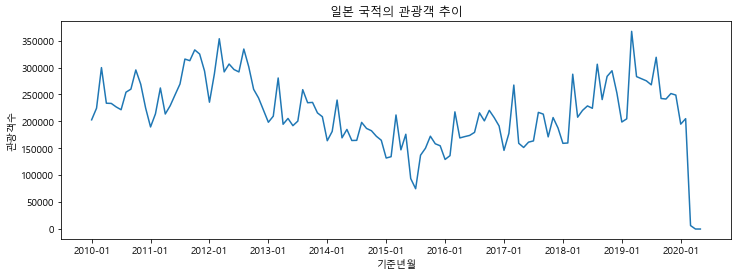

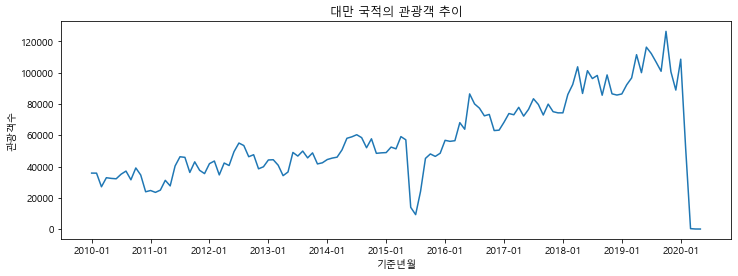

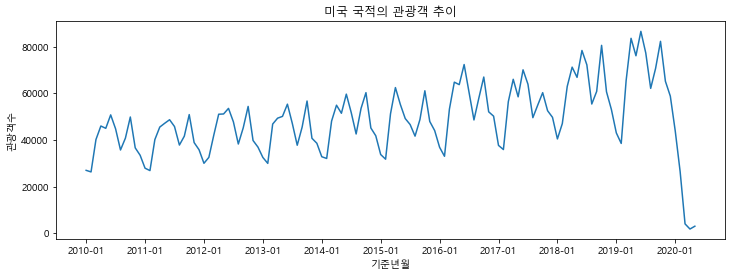

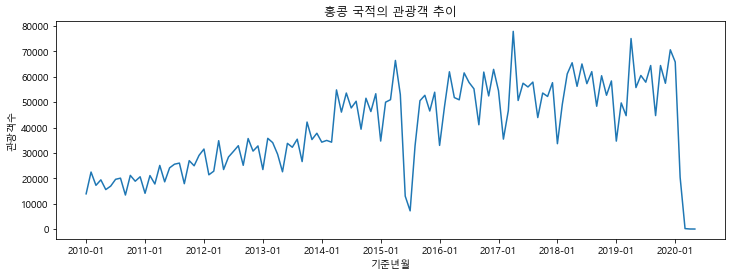

In [62]:
#--------------------------
# 중국, 일본, 대만, 미국, 홍콩
# 앞에서 그린 중국 관광객 그래프 참고해 그래프 생성
for cntry in cntry_list: 
    # 국적 관광객만 추출하기 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    # 그래프 그리기 
    ## 그래프 크기 조절 
    plt.figure(figsize = (12, 4))
    
    ## 그래프 내용 설정 
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    ## 그래프 타이틀, X축, Y축 이름 달기 
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    ## x 축 눈금 값 설정 
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

    ## 그래프 표현하기 
    plt.show()

## 히트맵 그래프 그리기
- 매트릭스 형태에 포함된 각 값을 컬러로 표현하는 데이터 시각화 방법
- 전체 데이터를 한 눈에 파악할 수 있다는 장점
- X축, Y축, 그래프 내용에 어떤 변수들이 들어가야 할 지 고민해야함
- 관광객 실습 히트맵 그래프
- X축 : 월, Y축 : 년도, 그래프 내용 : 관광객 숫자

In [63]:
#--------------------------
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [64]:
#--------------------------
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5, 7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [66]:
# 중국 국적 데이터만 추출
#--------------------------
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [67]:
#--------------------------
df_pivot = df_filter.pivot_table(values = '관광'
                         , index = '년도'
                         , columns = '월')

df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


## 히트맵 그래프
- 파이썬의 기본 시각화 라이브러리인 matplotlib 에서 지원하지 않고
- seaborn 라이브러리를 통해 생성
- 라이브러리 seaborn은 matplotlib에 종속되므로 다음과 같이 import

In [69]:
#--------------------------
import seaborn as sns #matplotlib는 이미 import 함

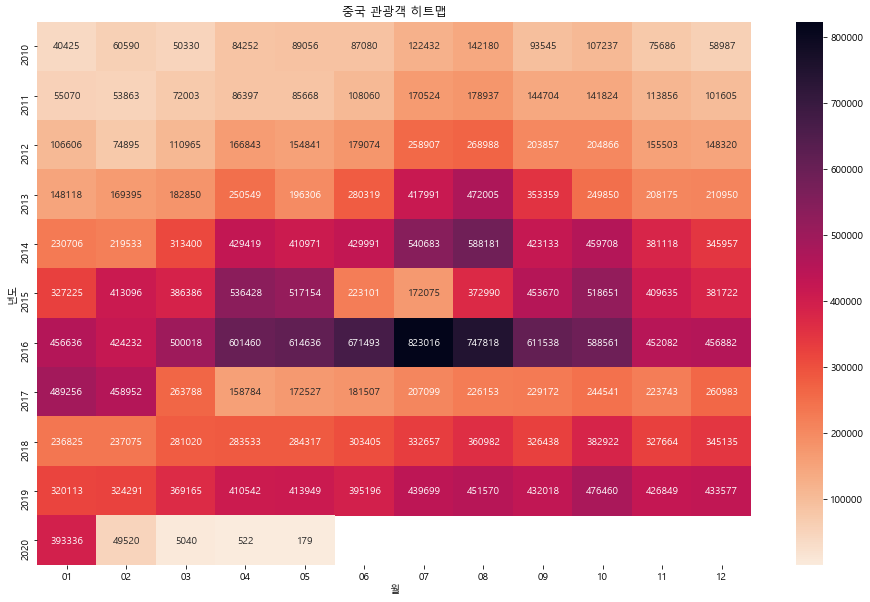

In [70]:
## 그래프 크기 설정 
plt.figure(figsize = (16, 10))

## 히트맵 그래프 그리기 
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r') # 히트맵 그래프 그리는 함수

## 그래프 타이틀 달기 
plt.title('중국 관광객 히트맵')

## 그래프 표현 
plt.show()

##  실습 문제

In [71]:
df_exam = pd.read_excel('w09_/kto_total.xlsx')
df_exam

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,대양주,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0


### 캡스톤 주제 :
- 조원 : 이승엽, 노영훈
- 유튜브 뮤직 긁어오기(함수 확인)
- 국적별 파일 만들어오기
